4.1 로지스틱 회귀분석

In [ ]:
import statsmodels.api as sm
import pandas as pd

In [ ]:
df = pd.read_csv('/content/sample_data/student_admission_train.csv', index_col = 0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 16 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gmat             30 non-null     int64  
 1   gpa              30 non-null     float64
 2   work_experience  30 non-null     int64  
 3   admitted         30 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.2 KB
None


In [ ]:
print(df.head())

    gmat  gpa  work_experience  admitted
16   580  2.7                4         0
33   660  3.3                6         1
8    740  3.3                5         1
38   590  1.7                4         0
32   660  4.0                4         1


In [ ]:
X = df[['gmat', 'gpa','work_experience']]
Y = df[['admitted']]

print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(30, 3)
(30, 1)


In [ ]:
X = sm.add_constant(X)
model = sm.Logit(Y, X)
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.247296
         Iterations 8


In [ ]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:               admitted   No. Observations:                   30
Model:                          Logit   Df Residuals:                       26
Method:                           MLE   Df Model:                            3
Date:                Tue, 04 Apr 2023   Pseudo R-squ.:                  0.6432
Time:                        07:04:33   Log-Likelihood:                -7.4189
converged:                       True   LL-Null:                       -20.794
Covariance Type:            nonrobust   LLR p-value:                 6.639e-06
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -16.3315      8.601     -1.899      0.058     -33.189       0.526
gmat                0.0025      0.018      0.141      0.888      -0.032       0.037
gpa                 3.3208      

In [ ]:
#Logit.from_formula() 함수 이용
model = sm.Logit.from_formula('admitted ~ gmat + gpa + work_experience', df)
results = model.fit()

print(results.summary())

Optimization terminated successfully.
         Current function value: 0.247296
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               admitted   No. Observations:                   30
Model:                          Logit   Df Residuals:                       26
Method:                           MLE   Df Model:                            3
Date:                Tue, 04 Apr 2023   Pseudo R-squ.:                  0.6432
Time:                        07:06:51   Log-Likelihood:                -7.4189
converged:                       True   LL-Null:                       -20.794
Covariance Type:            nonrobust   LLR p-value:                 6.639e-06
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -16.3315      8.601     -1.899      0.058     -33.189       0.526
gmat          

In [ ]:
new_candidates = {'const':[1],
                  'gmat': [590],
                  'gpa': [2],
                  'work_experience': [3]
                  }
df2 = pd.DataFrame(new_candidates)
print(df2)

   const  gmat  gpa  work_experience
0      1   590    2                3


In [ ]:
y_pred=results.predict(df2)
print (y_pred)

0    0.005377
dtype: float64


In [ ]:
import numpy as np
threshold = 0.5

y_pred = (y_pred > threshold).astype(np.int8) 
print(y_pred)

0    0
dtype: int8


In [ ]:
new_candidates = {'const':[1,1,1,1,1],
                  'gmat': [590,740,680,610,710],
                  'gpa': [2,3.7,3.3,2.3,3],
                  'work_experience': [3,4,6,1,5]
                  }

df2 = pd.DataFrame(new_candidates,columns= ['const', 'gmat', 'gpa','work_experience'])

print(df2)

   const  gmat  gpa  work_experience
0      1   590  2.0                3
1      1   740  3.7                4
2      1   680  3.3                6
3      1   610  2.3                1
4      1   710  3.0                5


In [ ]:
y_pred=results.predict(df2)
print (y_pred)

0    0.005377
1    0.857911
2    0.910066
3    0.002089
4    0.597692
dtype: float64


In [ ]:
y_pred = (y_pred > threshold).astype(np.int8) 
print(y_pred)

0    0
1    1
2    1
3    0
4    1
dtype: int8


4.2 머신러닝 기반 로지스틱 회귀분석

1) scikit-learn을 이용한 머신러닝

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('/content/sample_data/student_admission_train.csv', index_col = 0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 16 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gmat             30 non-null     int64  
 1   gpa              30 non-null     float64
 2   work_experience  30 non-null     int64  
 3   admitted         30 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.2 KB
None


In [ ]:
print(df.head())

    gmat  gpa  work_experience  admitted
16   580  2.7                4         0
33   660  3.3                6         1
8    740  3.3                5         1
38   590  1.7                4         0
32   660  4.0                4         1


In [ ]:
X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']
print(X.shape)
print(y.shape)

(30, 3)
(30,)


In [ ]:
model = LogisticRegression(random_state=0, fit_intercept = True)
model.fit(X, y)

LogisticRegression(random_state=0)

In [ ]:
#절편
print('Intercept:', model.intercept_)
#기울기
print('Coefficient:', model.coef_)

Intercept: [-17.61897717]
Coefficient: [[0.01779153 0.83599655 0.87068199]]


In [ ]:
#4번째 자리까지 출력
#절편
print('Intercept: {:.4f}'.format(model.intercept_[0]))
#기울기
print('Coefficient: {:.4f}, {:.4f}, {:.4f}'.format(model.coef_[0][0], model.coef_[0][1], model.coef_[0][2]))

Intercept: -17.6190
Coefficient: 0.0178, 0.8360, 0.8707


In [ ]:
new_candidates = {'gmat': [590],
                  'gpa': [2],
                  'work_experience': [3]
                  }
df2 = pd.DataFrame(new_candidates)
print(df2)

model.predict_proba(df2)

   gmat  gpa  work_experience
0   590    2                3


array([[0.9446918, 0.0553082]])

In [ ]:
model.predict(df2)
#임계값은 0.5가 디폴트 in scikit-learn

array([0])

In [ ]:
new_candidates = { 'gmat': [590,740,680,610,710],
                  'gpa': [2,3.7,3.3,2.3,3],
                  'work_experience': [3,4,6,1,5]
                  }
df2 = pd.DataFrame(new_candidates)
print(df2)

model.predict(df2)

   gmat  gpa  work_experience
0   590  2.0                3
1   740  3.7                4
2   680  3.3                6
3   610  2.3                1
4   710  3.0                5


array([0, 1, 1, 0, 1])

2) 파이토치를 이용한 머신러닝

In [ ]:
df = pd.read_csv('/content/sample_data/student_admission_train.csv', index_col = 0)

X = df.drop('admitted' , axis = 1).values #independent Feature
y = df['admitted'].values #dependent Feature
print(X.shape)
print(y.shape)

(30, 3)
(30,)


In [ ]:
import torch
from torch import sigmoid
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_tensor = torch.FloatTensor(X).to(device)
y_tensor = torch.FloatTensor(y).view(-1,1).to(device)

torch.manual_seed(1)

W = torch.zeros((3, 1), device=device, requires_grad=True)
b = torch.zeros(1, device=device, requires_grad=True)

learning_rate = 0.01
optimizer=torch.optim.Adam([W,b],lr=learning_rate)
epochs=10000

for epoch in range(epochs):
    y_pred = torch.sigmoid(X_tensor.matmul(W)+ b).to(device)
    #y_pred = torch.sigmoid(torch.matmul(X_tensor, W)+ b)     
    #loss = F.binary_cross_entropy(y_pred, y_tensor)
    loss = -(y_tensor * torch.log(y_pred) + 
             (1 - y_tensor) * torch.log(1 - y_pred)).mean()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    if (epoch+1) % 1000 == 0:
        print('epoch=',epoch+1, 'a=',W.detach().cpu().numpy(),
              'b=',b.detach().cpu().numpy(),'loss=',loss.detach().cpu().numpy())

epoch= 1000 a= [[-0.01169533]
 [ 1.9504068 ]
 [ 1.0378833 ]] b= [-2.3987286] loss= 0.3374268
epoch= 2000 a= [[-0.01215906]
 [ 3.02203   ]
 [ 1.0444835 ]] b= [-5.65858] loss= 0.2865036
epoch= 3000 a= [[-0.00905139]
 [ 3.3388727 ]
 [ 1.0346771 ]] b= [-8.758429] loss= 0.26448506
epoch= 4000 a= [[-0.00574107]
 [ 3.3621984 ]
 [ 1.0197347 ]] b= [-11.048932] loss= 0.2550341
epoch= 5000 a= [[-3.1664595e-03]
 [ 3.3428645e+00]
 [ 1.0143321e+00]] b= [-12.676987] loss= 0.2507847
epoch= 6000 a= [[-5.4285501e-04]
 [ 3.3283570e+00]
 [ 1.0063078e+00]] b= [-13.817906] loss= 0.25441018
epoch= 7000 a= [[-1.8135099e-04]
 [ 3.3231766e+00]
 [ 1.0071698e+00]] b= [-14.613123] loss= 0.24813141
epoch= 8000 a= [[7.680818e-04]
 [3.322818e+00]
 [1.003675e+00]] b= [-15.162708] loss= 0.24764942
epoch= 9000 a= [[2.1154077e-03]
 [3.3249831e+00]
 [1.0027202e+00]] b= [-15.540647] loss= 0.25541458
epoch= 10000 a= [[1.5273218e-03]
 [3.3263190e+00]
 [1.0019617e+00]] b= [-15.805741] loss= 0.2476507


In [ ]:
new_candidates = {'gmat': [590],
                  'gpa': [2],
                  'work_experience': [3]
                  }
df2 = pd.DataFrame(new_candidates)
print(df2)

X = df2.values
X_tensor = torch.FloatTensor(X).to(device)
print(X_tensor)

   gmat  gpa  work_experience
0   590    2                3
tensor([[590.,   2.,   3.]])


In [ ]:
threshold = 0.5
y_pred = torch.sigmoid(X_tensor.matmul(W)+ b).to(device)
print(y_pred) 
prediction = y_pred >= torch.FloatTensor([0.5]).to(device)
print(prediction)
prediction = (y_pred.detach().cpu().numpy() > threshold).astype(np.int8)
print(prediction)

tensor([[0.0052]], grad_fn=<SigmoidBackward0>)
tensor([[False]])
[[0]]


In [ ]:
new_candidates = { 'gmat': [590,740,680,610,710],
                  'gpa': [2,3.7,3.3,2.3,3],
                  'work_experience': [3,4,6,1,5]
                  }
df2 = pd.DataFrame(new_candidates)
print(df2)

X = df2.values
X_tensor = torch.FloatTensor(X).to(device)
print(X_tensor)

   gmat  gpa  work_experience
0   590  2.0                3
1   740  3.7                4
2   680  3.3                6
3   610  2.3                1
4   710  3.0                5
tensor([[590.0000,   2.0000,   3.0000],
        [740.0000,   3.7000,   4.0000],
        [680.0000,   3.3000,   6.0000],
        [610.0000,   2.3000,   1.0000],
        [710.0000,   3.0000,   5.0000]])


In [ ]:
y_pred = torch.sigmoid(X_tensor.matmul(W)+ b).to(device)
print(y_pred)
prediction = y_pred >= torch.FloatTensor([0.5]).to(device)
print(prediction)
prediction = (y_pred.detach().cpu().numpy() > threshold).astype(np.int8) 
print(prediction)

tensor([[0.0052],
        [0.8375],
        [0.9022],
        [0.0020],
        [0.5665]], grad_fn=<SigmoidBackward0>)
tensor([[False],
        [ True],
        [ True],
        [False],
        [ True]])
[[0]
 [1]
 [1]
 [0]
 [1]]


* 크로스 엔트로피 함수

In [ ]:
import torch
import torch.nn as nn

output =torch.tensor([[0.1, 0.2, 0.6, 0.1]],dtype=torch.float)
target = torch.tensor([2],dtype=torch.long)
ce_loss = nn.CrossEntropyLoss()
loss = ce_loss(output, target)
print('ce_loss :', loss.item())

ce_loss : 1.058963656425476


In [ ]:
#식 직접 구현
output =torch.tensor([[0.1, 0.2, 0.6, 0.1]],dtype=torch.float)
target = torch.tensor([0.0, 0.0, 1.0, 0.0])
softmax = nn.functional.softmax(output, dim=1)
print('output : ', output)
print('softmax :', softmax)
print('target : ', target)
ce_loss= -torch.sum(target*torch.log(softmax))
print('ce_loss :', ce_loss.item())

output :  tensor([[0.1000, 0.2000, 0.6000, 0.1000]])
softmax : tensor([[0.2104, 0.2325, 0.3468, 0.2104]])
target :  tensor([0., 0., 1., 0.])
ce_loss : 1.0589637756347656


In [ ]:
#binary target
output =torch.tensor([6, 4],dtype=torch.float)
target = torch.tensor([1.0, 0.0])
softmax = nn.functional.softmax(output, dim=0)
bce_loss = nn.BCELoss()
loss = bce_loss(softmax, target)
print('bce_loss :', loss.item())

bce_loss : 0.12692803144454956


In [ ]:
#직접 구현
output =torch.tensor([6, 4],dtype=torch.float)
target = torch.tensor([1.0, 0.0])
softmax = nn.functional.softmax(output, dim=0)
print('output : ', output)
print('softmax :', softmax)
print('target : ', target)
bce_loss= -torch.sum(target*torch.log(softmax))
print('bce_loss :', bce_loss.item())

output :  tensor([6., 4.])
softmax : tensor([0.8808, 0.1192])
target :  tensor([1., 0.])
bce_loss : 0.12692806124687195


In [ ]:
#배치 4개, 클래스 2개
torch.manual_seed(1)

m = nn.Sigmoid()
bce_loss = nn.BCELoss()
input = torch.randn(4, requires_grad=True)
print(input)
target = torch.empty(4).random_(2)
print(target)
print('sigmoid : ', m(input))
loss = bce_loss(m(input), target)
print('bce_loss : ', loss)

tensor([0.6614, 0.2669, 0.0617, 0.6213], requires_grad=True)
tensor([1., 0., 0., 1.])
sigmoid :  tensor([0.6596, 0.5663, 0.5154, 0.6505], grad_fn=<SigmoidBackward0>)
bce_loss :  tensor(0.6015, grad_fn=<BinaryCrossEntropyBackward0>)


In [ ]:
# 직접 구현
torch.manual_seed(1)

m = nn.Sigmoid()
input = torch.randn(4, requires_grad=True)
print(input)
target = torch.empty(4).random_(2)
print(target)
def BCE(input, target):
    total_bce_loss = torch.sum(-target * torch.log(m(input)) - (1 - target) * torch.log(1 - m(input)))
    num_of_samples = input.shape[0]
    mean_bce_loss = total_bce_loss / num_of_samples
    return mean_bce_loss    
print('sigmoid : ', m(input))
loss = BCE(input, target)
print('bce_loss : ', loss)

tensor([0.6614, 0.2669, 0.0617, 0.6213], requires_grad=True)
tensor([1., 0., 0., 1.])
sigmoid :  tensor([0.6596, 0.5663, 0.5154, 0.6505], grad_fn=<SigmoidBackward0>)
bce_loss :  tensor(0.6015, grad_fn=<DivBackward0>)


4.4 머신러닝을 이용한 분류모델의 성능 평가

In [ ]:
#ROC 곡선 그리기
fpr = np.array([1, 0.5, 0.25, 0.25, 0, 0])
tpr = np.array([1, 1, 0.5, 0.33, 0.33, 0])

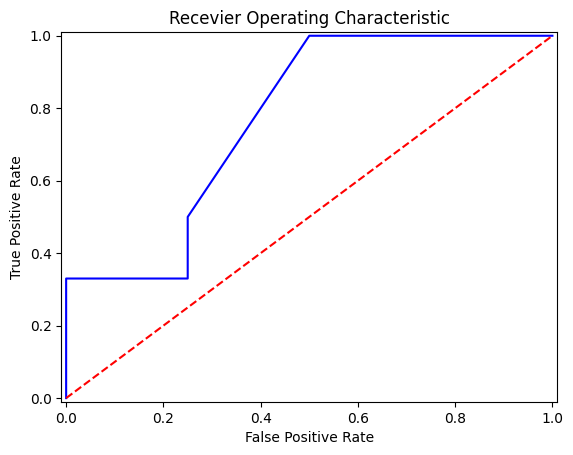

In [ ]:
import matplotlib.pyplot as plt
plt.title('Recevier Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#임계값을 더 세분하면 더 부드러운 곡선 얻을 수 있음

In [ ]:
#scikit-learn 이용한 ROC 곡선
from sklearn import metrics

y_true = np.array([1, 1, 2, 2])
y_score = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score, pos_label=2)
print("FPR : ", fpr)
print("TPR : ", tpr)
print("thresholds :", thresholds)

FPR :  [0.  0.  0.5 0.5 1. ]
TPR :  [0.  0.5 0.5 1.  1. ]
thresholds : [1.8  0.8  0.4  0.35 0.1 ]


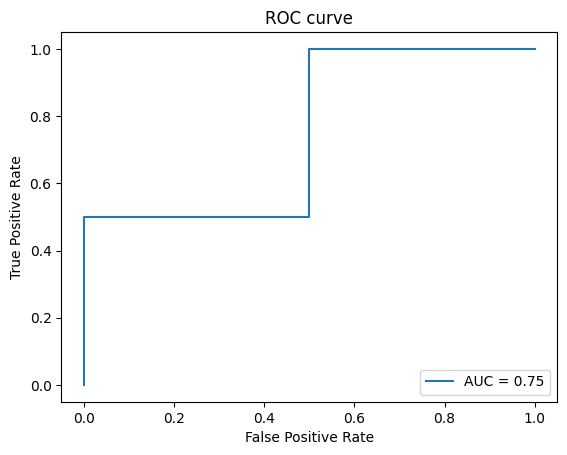

In [ ]:
auc = metrics.roc_auc_score(y_true, y_score)

plt.title('ROC curve')
plt.plot(fpr, tpr, label="AUC = "+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
BMI = [33.6, 26.6, 28.1, 31.0, 30.5, 25.8, 45.8, 43.3, 39.3, 29.0, ]
diabetic = [1, 0, 0, 1, 1,  0, 1, 1, 0, 1]

df = pd.DataFrame(
    {"BMI": BMI, "diabetic": diabetic}
)

print(df.head())

    BMI  diabetic
0  33.6         1
1  26.6         0
2  28.1         0
3  31.0         1
4  30.5         1


In [ ]:
X = df[['BMI']]
Y = df['diabetic']

In [ ]:
model = LogisticRegression(random_state = 0)
model.fit(X,Y)

LogisticRegression(random_state=0)

In [ ]:
print(model.intercept_)
print(model.coef_[0])

[-4.58162116]
[0.15420755]


In [ ]:
def sigmoid(x):
  return 1/ (1 + np.exp(-(x)))

In [ ]:
y_pred_prob = sigmoid(model.coef_[0]*X+model.intercept_)
print(y_pred_prob)

        BMI
0  0.645600
1  0.382323
2  0.438220
3  0.549540
4  0.530390
5  0.353642
6  0.922805
7  0.890471
8  0.814382
9  0.472627


thresholds= [1.9228051  0.9228051  0.89047145 0.81438152 0.47262685 0.35364247]


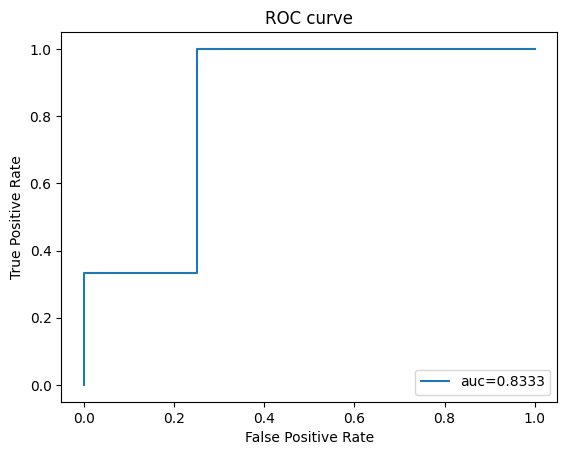

In [ ]:
plt.title('ROC curve')
fpr, tpr, thresholds = metrics.roc_curve(Y,  y_pred_prob)
print('thresholds=', thresholds)
auc = metrics.roc_auc_score(Y, y_pred_prob)
auc = round(auc,4) 
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
#좀 더 세련된 코드
BMI = [33.6, 26.6, 28.1, 31.0, 30.5, 25.8, 45.8, 43.3, 39.3, 29.0, ]
diabetic = [1, 0, 0, 1, 1,  0, 1, 1, 0, 1]

df = pd.DataFrame(
    {"BMI": BMI, "diabetic": diabetic}
)

X = df[['BMI']]
Y = df['diabetic']

model = LogisticRegression(random_state=0)
model.fit(X, Y)

LogisticRegression(random_state=0)

prediced probability shape= (10, 2)
prediced probability =
 [[0.35440031 0.64559969]
 [0.61767711 0.38232289]
 [0.56177994 0.43822006]
 [0.45045984 0.54954016]
 [0.46961022 0.53038978]]
y=1, prediced probability = [0.64559969 0.38232289 0.43822006 0.54954016 0.53038978]
threshold = [1.9228051  0.9228051  0.89047145 0.81438152 0.47262685 0.35364247]


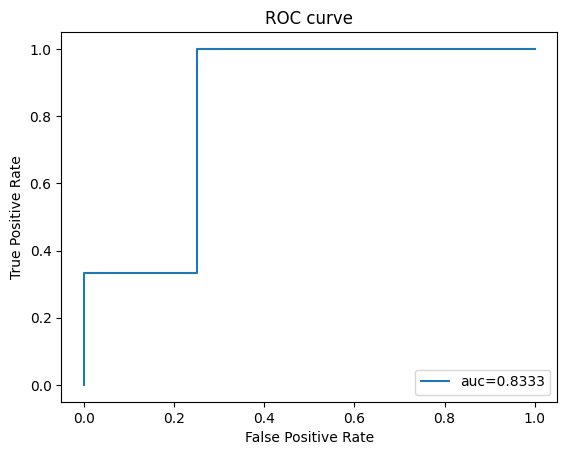

In [ ]:
plt.title('ROC curve')
y_pred_proba = model.predict_proba(X)
print("prediced probability shape=", y_pred_proba.shape)
print("prediced probability =\n", y_pred_proba[0:5,:])
# 레이블 값이 1일때의 예측 확률을 추출 
y_pred_proba = model.predict_proba(X)[:,1]
print("y=1, prediced probability =", y_pred_proba[0:5])
fpr, tpr, thresholds = metrics.roc_curve(Y,  y_pred_proba)
print("threshold =", thresholds)
auc = metrics.roc_auc_score(Y, y_pred_proba)
auc = round(auc,4) 
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

예제 4.4

In [ ]:
df = pd.read_csv('/content/sample_data/student_admission_train.csv', index_col = 0)

X = df.drop('admitted' , axis = 1).values
y = df['admitted'].values

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_tensor = torch.FloatTensor(X).to(device)
y_tensor = torch.FloatTensor(y).view(-1,1).to(device)

torch.manual_seed(1)

#원래는 randn 으로!
W = torch.zeros((3, 1), device=device, requires_grad=True)
b = torch.zeros(1, device=device, requires_grad=True)

learning_rate =0.01
optimizer=torch.optim.Adam([W,b],lr=learning_rate)

epochs=10000
for epoch in range(epochs):
    y_pred = torch.sigmoid(X_tensor.matmul(W)+ b).to(device) 
    loss = F.binary_cross_entropy(y_pred, y_tensor)
   
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    if (epoch+1) % 5000 == 0:
        print('epoch=',epoch+1, 'a=',W.detach().cpu().numpy(),
              'b=', b.detach().cpu().numpy(), 'loss=',loss.detach().cpu().numpy())

epoch= 5000 a= [[-3.1633894e-03]
 [ 3.3427646e+00]
 [ 1.0134279e+00]] b= [-12.665504] loss= 0.25078976
epoch= 10000 a= [[1.5779908e-03]
 [3.3267791e+00]
 [1.0038035e+00]] b= [-15.804272] loss= 0.24744685


In [ ]:
#성능 평가
df2 = pd.read_csv('/content/sample_data/student_admission_test.csv', index_col = 0)

X_test = df2.drop('admitted' , axis = 1).values
y_test = df2['admitted'].values

X_tensor = torch.FloatTensor(X_test).to(device)
y_tensor = torch.FloatTensor(y_test).to(device)

threshold = 0.5
y_pred = torch.sigmoid(X_tensor.matmul(W)+ b).to(device)
print(y_pred)

prediction = (y_pred.detach().cpu().numpy() > threshold).astype(np.int8) 
print(prediction)

tensor([[2.1867e-03],
        [2.2818e-02],
        [2.1664e-02],
        [5.4786e-02],
        [7.4594e-04],
        [5.8066e-01],
        [3.5447e-01],
        [2.0683e-02],
        [7.8008e-01],
        [9.7462e-01]], grad_fn=<SigmoidBackward0>)
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]]


In [ ]:
from sklearn.metrics import confusion_matrix
# confusion matrix
confusion_matrix = confusion_matrix(y_test, prediction)
TN=confusion_matrix[0][0]
FP=confusion_matrix[0][1]
FN=confusion_matrix[1][0]
TP=confusion_matrix[1][1]
precision= TP/(TP+FP)
sensitivity=TP/(TP+FN)
specificity=TN/(FP+TN)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print ("Confusion Matrix : \n", confusion_matrix)
print ("Precision : ", precision)
print ("Sensitivity : ", sensitivity)
print ("Specificity : ", specificity)
print ("Accuracy : ", accuracy)

Confusion Matrix : 
 [[6 0]
 [1 3]]
Precision :  1.0
Sensitivity :  0.75
Specificity :  1.0
Accuracy :  0.9


In [ ]:
#sklearn.metrics 모듈에서 제공되는 함수로 구하기
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy :",metrics.accuracy_score(y_test, prediction))
print("Precision :",metrics.precision_score(y_test, prediction))
print("Sensitivity :",metrics.recall_score(y_test, prediction))

Accuracy : 0.9
Precision : 1.0
Sensitivity : 0.75


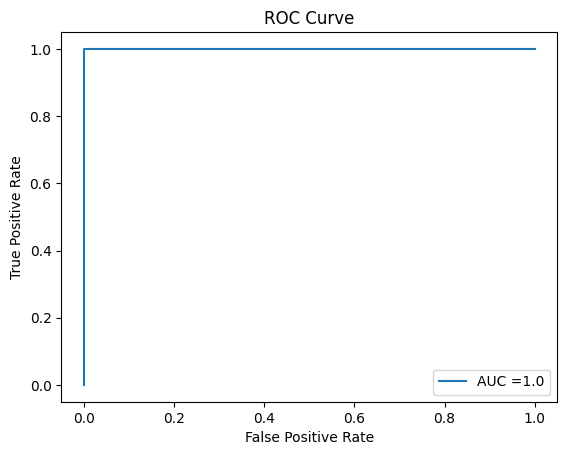

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred.detach().cpu().numpy())
auc = metrics.roc_auc_score(y_test, y_pred.detach().cpu().numpy())
plt.plot(fpr, tpr, label="AUC ="+str(auc))
plt.legend(loc=4)
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#완벽한 분류 모델 의미!

예제 4.5

In [ ]:
#scikit-learn 이용
pima = pd.read_csv('/content/sample_data/pima-indians-diabetes.csv')

X = pima[['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = pima['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
# instantiate the model (using the default parameters)
model = LogisticRegression()

# fit the model with data
model.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#prediction
y_pred = model.predict(X_test)

In [ ]:
#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
TN=confusion_matrix[0][0]
FP=confusion_matrix[0][1]
FN=confusion_matrix[1][0]
TP=confusion_matrix[1][1]
precision= TP/(TP+FP)
sensitivity=TP/(TP+FN)
specificity=TN/(FP+TN)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print("Confusion Matrix : \n", confusion_matrix)
print("Precision : ", round(precision,4))
print("Sensitivity : ", round(sensitivity,4))
print("Specificity : ", round(specificity,4))
print("Accuracy : ", round(accuracy,4))

Confusion Matrix : 
 [[115  15]
 [ 25  37]]
Precision :  0.7115
Sensitivity :  0.5968
Specificity :  0.8846
Accuracy :  0.7917


(192, 2)
[[0.02568921 0.97431079]
 [0.83977115 0.16022885]
 [0.92321625 0.07678375]
 [0.31949287 0.68050713]
 [0.87803338 0.12196662]]
[0.97431079 0.16022885 0.07678375 0.68050713 0.12196662]


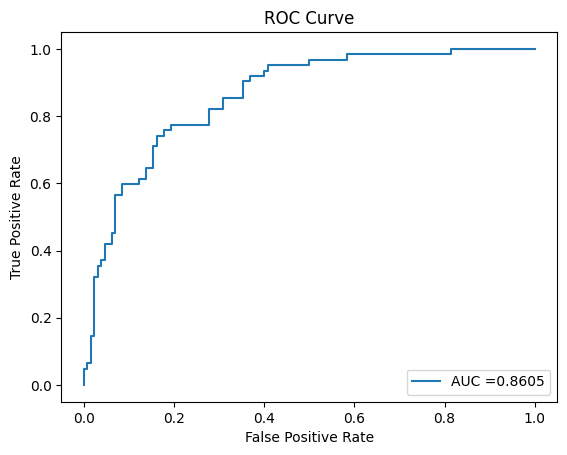

In [ ]:
#ROC 및 AUC 곡선
y_pred_proba = model.predict_proba(X_test)
print(y_pred_proba.shape)
print(y_pred_proba[0:5,:])
# 레이블 값이 1일때의 예측 확률을 추출 
y_pred_proba = model.predict_proba(X_test)[:,1]
print(y_pred_proba[0:5])
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc =round(auc, 4)
plt.plot(fpr, tpr, label="AUC ="+str(auc))
plt.legend(loc=4)
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#파이토치 이용
pima = pd.read_csv('/content/sample_data/pima-indians-diabetes.csv')
print(pima.head())

X = pima.drop('Outcome' , axis = 1).values
y = pima['Outcome'].values 

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size =0.25,random_state=0)

# Creating Tensors
X_train=torch.FloatTensor(X_train).to(device)
X_test=torch.FloatTensor(X_test).to(device)
y_train=torch.FloatTensor(y_train).view(-1,1).to(device)
y_test=torch.FloatTensor(y_test).view(-1,1).to(device)

print(X_train.shape)
print(y_train.shape)

import torch
from torch import sigmoid
import torch.nn.functional as F

W = torch.zeros((8, 1),device=device, requires_grad=True)
b = torch.zeros(1, device=device, requires_grad=True)

torch.Size([576, 8])
torch.Size([576, 1])


In [ ]:
optimizer=torch.optim.Adam([W,b],lr=0.01)
epochs=3000
for epoch in range(epochs):
    y_pred = torch.sigmoid(X_train.matmul(W)+ b).to(device)   
    loss = F.binary_cross_entropy(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    if (epoch+1) % 1000 == 0:
        print('epoch=',epoch+1, 'a=', W.detach().cpu().numpy(),
              'b=', b.detach().cpu().numpy(), 'loss=',loss.detach().cpu().numpy())

epoch= 1000 a= [[ 8.3903380e-02]
 [ 2.2933830e-02]
 [-1.8483380e-02]
 [ 5.4355604e-03]
 [-3.6933040e-04]
 [ 4.2829301e-02]
 [ 5.6375253e-01]
 [ 8.6207874e-03]] b= [-4.44691] loss= 0.5074574
epoch= 2000 a= [[ 8.5310109e-02]
 [ 3.0024620e-02]
 [-1.3273766e-02]
 [ 5.7264469e-03]
 [-7.5216260e-04]
 [ 7.3265336e-02]
 [ 7.8592449e-01]
 [ 1.7962202e-02]] b= [-7.152686] loss= 0.48486152
epoch= 3000 a= [[ 0.08647627]
 [ 0.03240571]
 [-0.01168753]
 [ 0.00587989]
 [-0.00094193]
 [ 0.08422942]
 [ 0.8663855 ]
 [ 0.0210119 ]] b= [-8.097955] loss= 0.48268408


In [ ]:
y_pred = torch.sigmoid(X_test.matmul(W)+ b).to(device)
prediction = y_pred >= torch.FloatTensor([0.5]).to(device)

In [ ]:
#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test.cpu().numpy(), prediction.cpu().numpy())
TN=confusion_matrix[0][0]
FP=confusion_matrix[0][1]
FN=confusion_matrix[1][0]
TP=confusion_matrix[1][1]
precision= TP/(TP+FP)
sensitivity=TP/(TP+FN)
specificity=TN/(FP+TN)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print ("Confusion Matrix : \n", confusion_matrix)
print ("Precision : ", round(precision,4))
print ("Sensitivity : ", round(sensitivity,4))
print ("Specificity : ", round(specificity,4))
print ("Accuracy : ", round(accuracy,4))

Confusion Matrix : 
 [[118  12]
 [ 26  36]]
Precision :  0.75
Sensitivity :  0.5806
Specificity :  0.9077
Accuracy :  0.8021


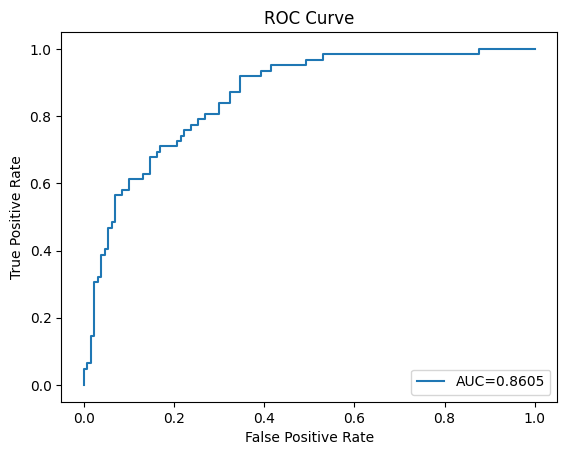

In [ ]:
#ROC 및 AUC 곡선
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred.detach().cpu().numpy())
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc=round(auc,4)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()